In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

In [2]:
img_rows, img_cols = 28, 28

# **Data Loading and Splitting**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

1


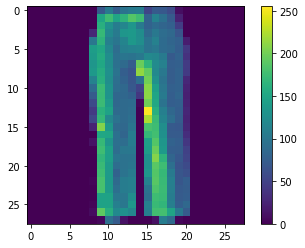

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[826])
plt.colorbar()
plt.grid(False)
print(y_train[826])

# **Data normalization**

In [5]:
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Neural Network Design**

In [9]:
input_shape

(28, 28, 1)

In [38]:
import tensorflow as tf
model = tf.keras.Sequential([
    Conv2D(32, kernel_size = (3,3), activation = tf.nn.relu, kernel_initializer = 'he_uniform', input_shape = input_shape),
    #choose the best features
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),

    # flatten since too many dimensions, we only want a classification output
    Flatten(),
    #fully connected to get all relevant data
    Dense(100, activation = tf.nn.relu, kernel_initializer = 'he_uniform'),
    Dense(10, activation = tf.nn.softmax)
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

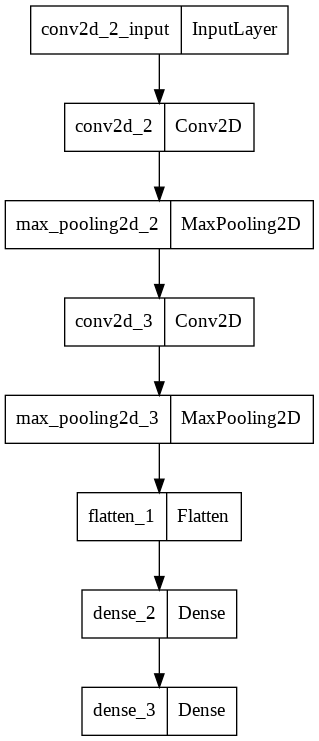

In [40]:
tf.keras.utils.plot_model(model, to_file='model.png')

# **Model Evaluation**

In [42]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(lr = 0.01, momentum = 0.9),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [43]:
model.fit(x_train, y_train, epochs = 15, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4390 - accuracy: 0.8404 - val_loss: 0.3332 - val_accuracy: 0.8805
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.8951 - val_loss: 0.3053 - val_accuracy: 0.8918
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2424 - accuracy: 0.9103 - val_loss: 0.2634 - val_accuracy: 0.9038
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2131 - accuracy: 0.9216 - val_loss: 0.2444 - val_accuracy: 0.9127
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1919 - accuracy: 0.9282 - val_loss: 0.2465 - val_accuracy: 0.9132
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1755 - accuracy: 0.9341 - val_loss: 0.2568 - val_accuracy: 0.9075
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1599 - accuracy: 0.9404 - val_loss: 0.2512 - val_accuracy:

In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
test_accuracy

0.9074000120162964

In [45]:
# save model to avoid training it again
model.save('model.h5')
print('saved')

saved


In [46]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [47]:
def load_image(filename):
  img = load_img(filename, color_mode = "grayscale", target_size = (28,28))
  img = img_to_array(img)

  # reshape image to single sample with one channel
  img = img.reshape(1,28,28,1)

  #prepare pixel data (preprocesing)
  img = img.astype('float32')
  img = img/255.0
  return img

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Classes:**

0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandals
6. Shirt
7. Sneakers
8. Bag
9. Ankle boots

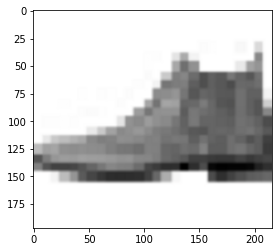

1/1 [==============================] - 0s 17ms/step


9

In [72]:
import numpy as np
image = load_image('/content/gazma.png')
imge = mpimg.imread('/content/gazma.png')
imgplot = plt.imshow(imge)
plt.show()

pred = model.predict(image)
cl=np.argmax(pred)
cl

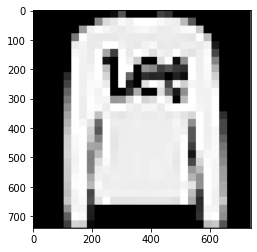

1/1 [==============================] - 0s 16ms/step


2

In [73]:
image = load_image('/content/ttt.jpeg')
imge = mpimg.imread('/content/ttt.jpeg')
imgplot = plt.imshow(imge)
plt.show()

pred2 = model.predict(image)
cl2 = np.argmax(pred2)
cl2

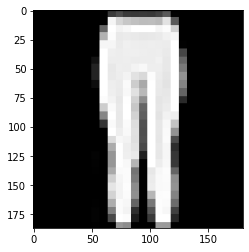

1/1 [==============================] - 0s 28ms/step


1

In [80]:
image = load_image('/content/p.png')
imge = mpimg.imread('/content/p.png')
imgplot = plt.imshow(imge)
plt.show()

pred3 = model.predict(image)
cl3 =np.argmax(pred3)
cl3